# Análise do IBGE

## Introdução

O Instituto Brasileiro de Geografia e Estatística ([IBGE](https://www.ibge.gov.br/)) é um instituto público da administração federal brasileira criado em 1934 e instalado em 1936 com o nome de Instituto Nacional de Estatística; seu fundador e grande incentivador foi o estatístico Mário Augusto Teixeira de Freitas. O nome atual data de 1938. A sede do IBGE está localizada na cidade do Rio de Janeiro.

O IBGE tem atribuições ligadas às geociências e estatísticas sociais, demográficas e econômicas, o que inclui realizar censos e organizar as informações obtidas nesses censos, para suprir órgãos das esferas governamentais federal, estadual e municipal, e para outras instituições e o público em geral.

Este material encontra-se dividido em três etapas: 
* 1ª Etapa: Verificação e análise inicial dos dados;
* 2ª Etapa: Respostas das perguntas.

## Objeto de análise:


## Objetivos

Os objetivos da análise são:

* Encontrar as variáveis mais correlacionadas;
* Encotrar padrões para os valores da resistência do concreto à compressão
* Encontrar o melhor modelo preditivo;

## Informações sobre o dataset e limitações

O dataset nos forcene os seguintes dados:

Attribute Information:
* UF: Representa o estado analisado;
* Sexo: Representa o gênero biológico;
* Idade: Representa a idade da pessoa entrevistada;
* Cor: Representa a cor da pessoa analisada;
* Anos de estudo: Representa a quantidade de anos estudados pela pessoa;
* Renda: Representa a renda da família;
* Altura: Representa a altura média da família. **ESTE ATRIBUTO FOI CRIADO DE MANEIRA ARTIFICIAL**



**FONTE:**
* [IBGE](https://www.ibge.gov.br/)


**LIMITAÇÕES DA ANÁLISE:**
* Os dados  vinheram enumerados para evitar algum vies na hora da análise.

## Metodologia
* Para as análises e limpezada dos dados foi utilizada a linguagem de programação Python com a interface do Jupyter.

* Para as análises estatísticas foram utilizadas bibliotecas do Python.

## Importações iniciais

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import plotly.graph_objects as go
import plotly.express as px
from biokit.viz import corrplot

# configurações
import warnings
warnings.filterwarnings('ignore')

# Análise inicial

In [48]:
ibge = pd.read_csv('dados.csv')

In [49]:
ibge.sample(5)

UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
59098  41     0     41    2              12   3000  1.666406
53581  35     0     35    2              12   5200  1.784827
11641  21     0     28    8              12   3000  1.665111
7890   15     0     42    2               8    500  1.806588
40314  32     1     32    8               4    700  1.763282

## Verificações iniciais e dados nulos

**TAMANHO DA AMOSTRA**

In [50]:
ibge.shape

(76840, 7)

**DADOS NULOS**

In [51]:
ibge.isnull().sum().sum()

0

**TIPOS DE DADOS**

In [52]:
ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


**RENOMEANDO AS COLUNAS**

In [53]:
ibge.rename(mapper={'Anos de Estudo':'Anos_de_estudo'}, axis=1, inplace=True )

**OTIMIZANDO O DATASET**

In [54]:
# otimizando algumas colunas
ibge.Cor = ibge.Cor.astype(np.int8)
ibge.Idade = ibge.Idade.astype(np.int16)
ibge.Sexo = ibge.Sexo.astype(np.int8)
ibge.Anos_de_estudo = ibge.Anos_de_estudo.astype(np.int8)
ibge.Altura = ibge.Altura.astype(np.float32)

In [55]:
ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int8   
 2   Idade           76840 non-null  int16  
 3   Cor             76840 non-null  int8   
 4   Anos_de_estudo  76840 non-null  int8   
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float32
dtypes: float32(1), int16(1), int64(2), int8(3)
memory usage: 1.8 MB


Nota-se uma redução de **2.3 MB**.

## Descrições estatísticas

### Estatísticas dos dados

Testando o melhor estimador de [bins](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html)

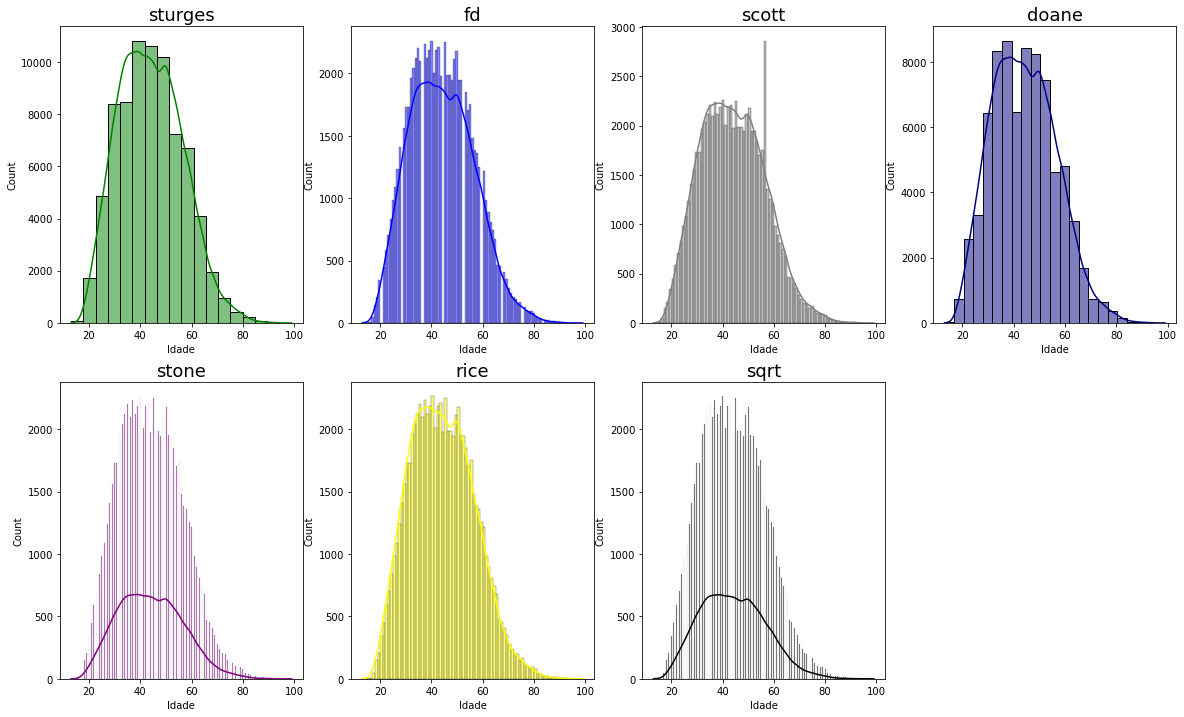

In [56]:
plt.figure(figsize=(20, 12))

names = ['sturges', 'fd', 'scott', 'doane', 'stone', 'rice', 'sqrt' ]
colors = ['green', 'blue', 'gray', 'navy', 'purple', 'yellow', 'black']

for i, j in enumerate(names):
    plt.subplot(2, 4, i+1)
    plt.title(j, fontsize=18)
    sns.histplot(ibge, x='Idade', bins=j, color=colors[i], kde=True)

**ESTATÍSTICA DESCRITIVA**

In [57]:
ibge.describe()

UF          Sexo         Idade           Cor  Anos_de_estudo  \
count  76840.000000  76840.000000  76840.000000  76840.000000    76840.000000   
mean      31.912962      0.307002     44.071421      5.032613        9.469664   
std       11.147830      0.461253     12.480583      2.857118        4.539929   
min       11.000000      0.000000     13.000000      0.000000        1.000000   
25%       25.000000      0.000000     34.000000      2.000000        6.000000   
50%       31.000000      0.000000     43.000000      4.000000       11.000000   
75%       41.000000      1.000000     53.000000      8.000000       12.000000   
max       53.000000      1.000000     99.000000      8.000000       17.000000   

               Renda        Altura  
count   76840.000000  76840.000000  
mean     2000.383199      1.699513  
std      3323.387730      0.079717  
min         0.000000      1.339245  
25%       788.000000      1.645785  
50%      1200.000000      1.699325  
75%      2000.000000      1.753062  
max    200000.000000      2.028497

### Plotando a distribuição dos dados

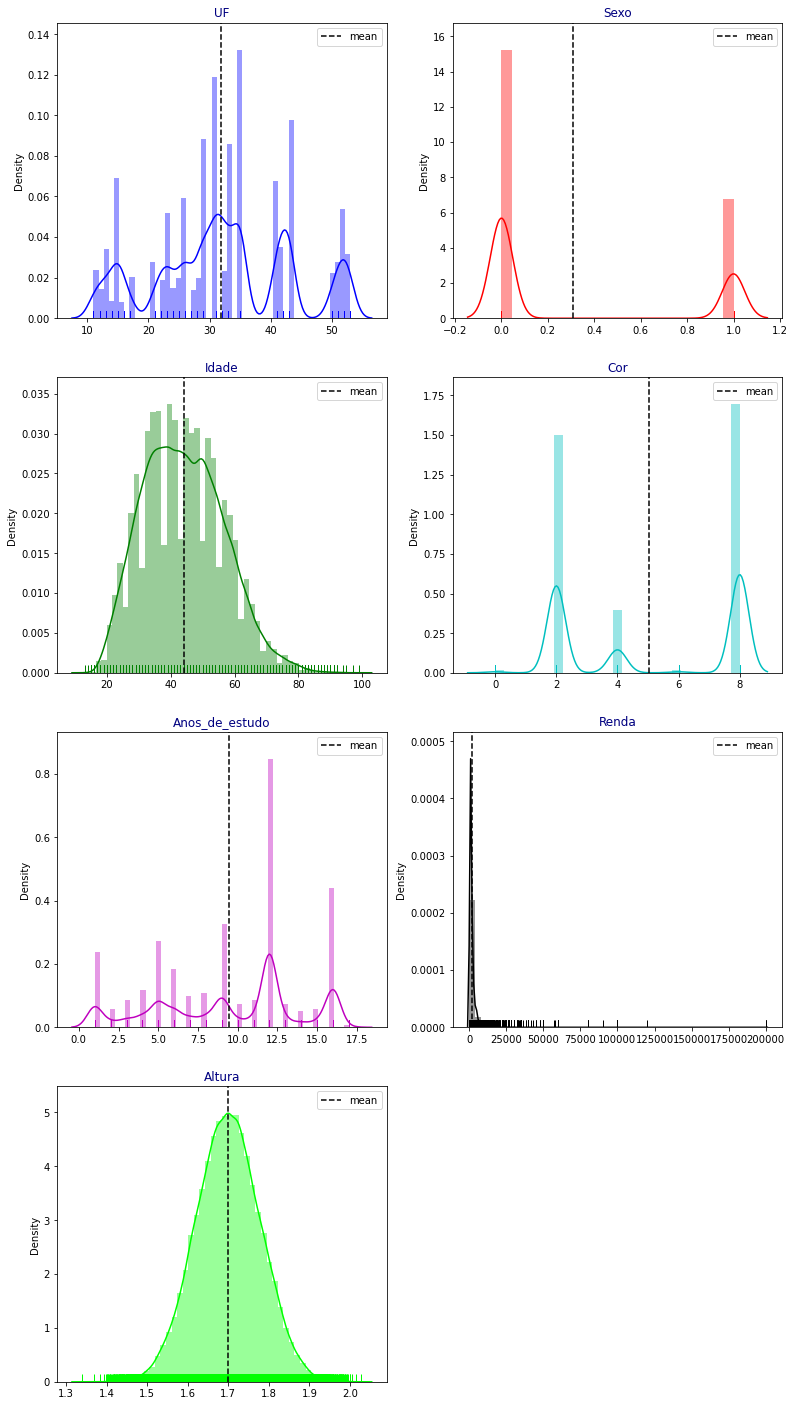

In [58]:
cols = [i for i in ibge.columns]
length = len(cols)
cs = ["b", "r", "g", "c", "m", "k", "lime"]
fig = plt.figure(figsize=(13, 25))

for i, j, k in itertools.zip_longest(cols, range(length), cs):
    plt.subplot(4, 2, j+1)
    ax = sns.distplot(ibge[i], color=k, rug=True)
    ax.set_facecolor("w")
    plt.axvline(ibge[i].mean(), linestyle="dashed", label="mean", color="k")
    plt.legend(loc="best")
    plt.title(i, color="navy")
    plt.xlabel("")

* UF: Nada expressivo.
* Sexo: Que a marcação `0` é  bastante superior a marcação `1`.
* Idade: Aparentemente apresenta distribuição normal. Contudo, existe uma leve assimetria a direita indicando idades avançadas. De forma geral, a média encontra-se na  faixa dos 40 anos.
* Cor: São dados categórios. Pode-se observar que as cores 8, 2 e 4 são as predominantes na pesquisa.
* Anos de estudo: É possível observar picos ao longo do aumento da varíavel. Tal fato, pode indicar a conclusão da etapas de ensino, isto é, primário, primeiro grau, segundo grau, grauação e pós-graduação.
* Renda: A variável *Renda* sofre uma forte assimetria a direita, indicando a presença de *outliers*. **Vamos fazer uma análise mais pontual desta variável**
* Altura: Segue um distribuição normal. **Esta variável foi criada, por isso serve apenas de exemplo**

### Verificando a normalidade

In [59]:
from scipy.stats import normaltest

def normal_test(frame, sig):
    sig = sig
    p_list = []
    normal_list = []

    for i in frame.columns:
        stats, p_valor = normaltest(frame[i])
        p_list.append(p_valor.round(4))
        if p_valor <= sig:
            e_normal = False
            normal_list.append(e_normal)
        else:
            e_normal = True
            normal_list.append(e_normal)

    normal_df = pd.DataFrame({'p_value':p_list, 'normal':normal_list}, index=frame.columns)
    normal_df.columns.name = 'features'
    return normal_df


In [60]:
normal_test(ibge, sig=0.05)

features        p_value  normal
UF                0.000   False
Sexo              0.000   False
Idade             0.000   False
Cor               0.000   False
Anos_de_estudo    0.000   False
Renda             0.000   False
Altura            0.905    True

Os testes inplicam de para um grau de confiança de 95% só a variável *Altura* apresenta a distribuição normal.

# Análise dos atributos

Nesta etapa vamos análisar algumas *features* pedidas e responder alguns questionamentos pedidos

## Variável `Renda`
Pela análise univarida desta feature, foi possível notar a presença de outliers. Por isso, vamos criar um filtro para que nos possamos analisar melhor as rendas mais usuais.

In [61]:
filtro = (ibge.Renda < 10000)

In [62]:
renda_filtrada = ibge[filtro]

Vale salientar, que com a aplicação deste filtro houve uma remoção de 2004 dados.

### Renda por sexo

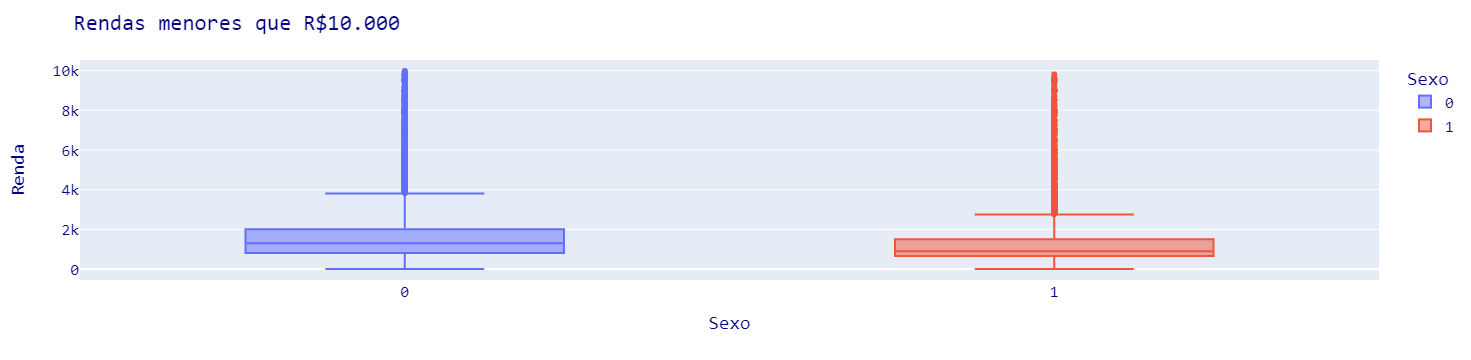

In [63]:
# criando o boxplot de comparação
fig = px.box(renda_filtrada, x="Sexo", y='Renda', color='Sexo')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

# ajustando o layout
fig.update_layout(
    title="Rendas menores que R$10.000",
    xaxis_title="Sexo",
    yaxis_title="Renda",
    font=dict(family="New latin, monospace", size=16, color="navy"),
#     legend=dict(x=1.5, y=1.5)
)

fig.show()

Assim, pode-se notar que apesar de haver a assimetria à direita, ela foi reduzida. Assim, graficamente, pode-se chegar a hipotese que o índice `0` tem um salário maior que o índice `1`. ($i$)

**CONFIRMANDO HIPÓTESE $i$**

### Renda por cor

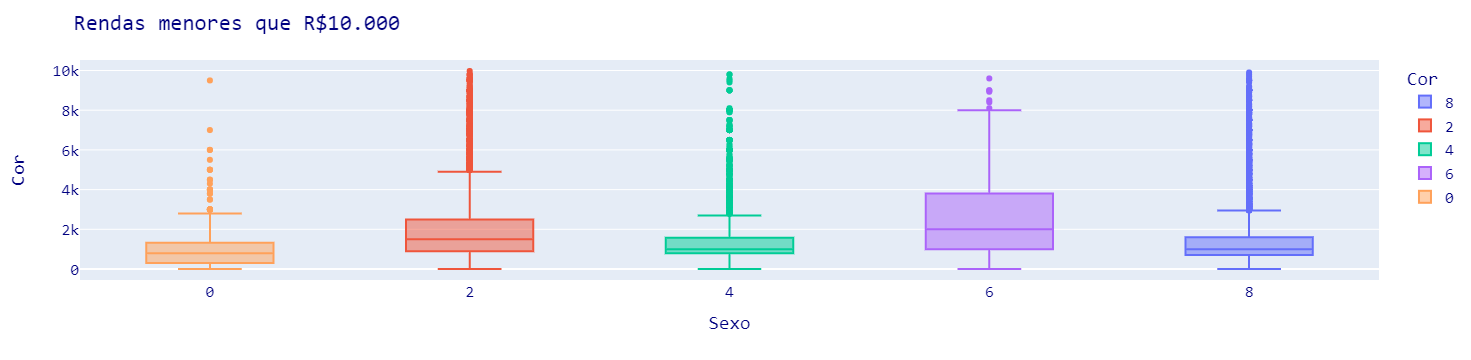

In [64]:
# criando o boxplot de comparação
fig = px.box(renda_filtrada, x="Cor", y='Renda', color='Cor')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

# ajustando o layout
fig.update_layout(
    title="Rendas menores que R$10.000",
    xaxis_title="Sexo",
    yaxis_title="Cor",
    font=dict(family="New latin, monospace", size=16, color="navy"),
#     legend=dict(x=1.5, y=1.5)
)

fig.show()

A maior renda está com a cor `6`.

### Agrupando a renda em faixas de salário mínimos.

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576

In [65]:
# criando parâmetros auxiliares
classes = [ibge.Renda.min(), 1576, 3152, 7880, 15760, ibge.Renda.max()]
labels = ['E', 'D', 'C', 'B', 'A']

# faixas de rendas
faixas = pd.cut(x = ibge.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)

# criando o dataframe
frequencia = pd.value_counts(faixas, normalize=True)

# inserindo a série no dataframe
ibge['faixa_de_renda'] = faixas

# visualizando o dataframe
classes = frequencia.round(4).to_frame()*100
classes.sort_index(ascending=False)

Renda
A   0.79
B   2.83
C   9.89
D  21.73
E  64.75

In [75]:
faixa = ibge.groupby('faixa_de_renda').sum()

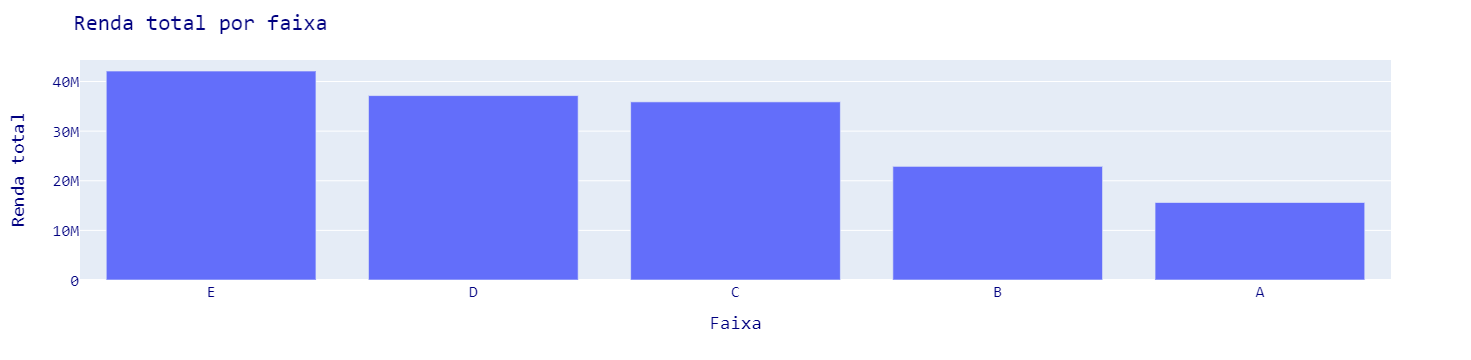

In [78]:

fig = px.bar(faixa, x=faixa.index, y='Renda' )

# ajustando o layout
fig.update_layout(
    title="Renda total por faixa",
    xaxis_title="Faixa",
    yaxis_title="Renda total",
    font=dict(family="New latin, monospace", size=16, color="navy"),
#     legend=dict(x=1.5, y=1.5)
)

fig.show()

### Correlacionando a faixa de renda com a cor

In [67]:
frequencia = pd.crosstab(ibge.faixa_de_renda,
                         ibge.Cor,
                         normalize=True
                        )
# frequencia.rename(index = Renda, inplace = True)
# frequencia.rename(columns = cor, inplace = True)
frequencia.round(4)*100

Cor                0      2     4     6      8
faixa_de_renda                                
E               0.37  21.70  8.15  0.17  34.35
D               0.06  11.05  1.98  0.12   8.53
C               0.02   6.02  0.67  0.10   3.08
B               0.00   2.02  0.10  0.06   0.65
A               0.00   0.61  0.02  0.02   0.15